### Entendiendo los datos

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
#from sklearn.externals.six import StringIO
#from sklearn import linear_model,cross_validation
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

In [ ]:
plt.style.use('ggplot')

## Census Income Dataset

Datos de la Universidad de California.

<table>
<tr>
    <th>Columns</th>
    <th>Descriptions</th>
</tr>
<tr>
    <td>age</td>
    <td> Age of the Person</td>
</tr>
<tr>
    <td>workclass</td>
    <td>The type of employment of the person</td>
</tr>
<tr>
    <td>education</td>
    <td>Education level of the person</td>
</tr>
<tr>
    <td>marital_status</td>
    <td>If the person if married or not</td>
</tr>
<tr>
    <td>Occupation</td>
    <td>What type of jobs does the person do</td>
</tr>
<tr>
    <td>relationship</td>
    <td>Type of relationship of the person</td>
</tr>
<tr>
    <td>race</td>
    <td>Ethinicity of the person</td>
</tr>
<tr>
    <td>gender</td>
    <td>Gender of the person </td>
</tr>
<tr>
    <td>hours_per_week</td>
    <td>Average hours worked per week</td>
</tr>
<tr>
    <td>native_country</td>
    <td>Country of origin</td>
</tr>
<tr>
    <td>greater_than_50k</td>
    <td>Flag which indicates if the person is earning more than 50K dollars in a year</td>
</tr>
</table>

Cargamos los datos

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Repositorios
path_dmc = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Python for analytics/'

In [ ]:
data = pd.read_csv(path_dmc + 'census.csv')
data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [ ]:
def func(x):
    if x=='Federal-gov':
        return 1
    elif x=='Local-gov':
        return 2
    return 3

In [ ]:
#data['wkc_2'] = data['workclass'].apply(func)

In [ ]:
data.head(5)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


Veamos el nivel de poblamiento de las variables

In [ ]:
data.count(0)/data.shape[0] * 100

age                 100.000000
workclass            94.361179
education           100.000000
education_num       100.000000
marital_status      100.000000
occupation           94.339681
relationship        100.000000
race                100.000000
gender              100.000000
hours_per_week      100.000000
native_country       98.209459
greater_than_50k    100.000000
dtype: float64

In [ ]:
data.shape

(32560, 12)

Eliminamos variable duplicada

In [ ]:
#data = data.dropna(how='any')
del data['education_num']

Exploramos los datos y entendemos ciertos patrones existentes.

<strong>Hipótesis 1: Personas mayores, ganan más.</strong>


In [ ]:
# El grupo de personas que ganan más de 50K.
data[data.greater_than_50k == 1].head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1
11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,1


In [ ]:
data[data.greater_than_50k == 1].age.values

array([52, 31, 42, ..., 53, 40, 52])

Text(0, 0.5, 'Frecuencia')

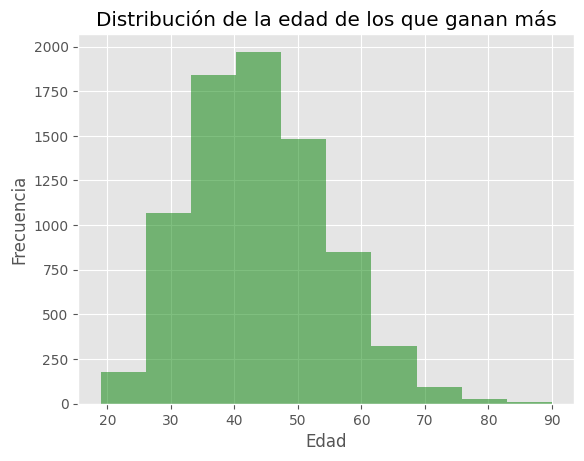

In [ ]:
hist_above_50 = plt.hist(data[data.greater_than_50k == 1].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Distribución de la edad de los que ganan más')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Los que ganan más, se concentran entre los 35 a 55 años.

Y en los que ganan menos

Text(0, 0.5, 'Frecuencia')

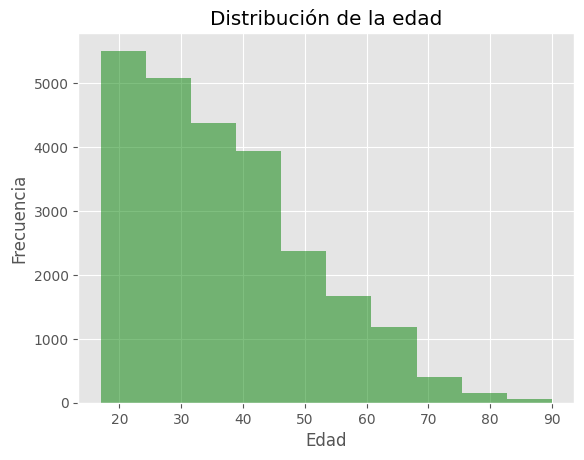

In [ ]:
hist_below_50 = plt.hist(data[data.greater_than_50k == 0].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Los que ganen menos se concentran entre los 20 y 30 años.

<strong>Hipótesis 2: Ingresos varían dependiendo del tipo de empleo </strong>

In [ ]:
data[data.greater_than_50k == 1].groupby('workclass').workclass.count()

workclass
 Federal-gov          371
 Local-gov            617
 Private             4963
 Self-emp-inc         622
 Self-emp-not-inc     724
 State-gov            353
Name: workclass, dtype: int64

In [ ]:
data[data.greater_than_50k == 0].groupby('workclass').workclass.count()

workclass
 Federal-gov           589
 Local-gov            1476
 Never-worked            7
 Private             17732
 Self-emp-inc          494
 Self-emp-not-inc     1817
 State-gov             945
 Without-pay            14
Name: workclass, dtype: int64

In [ ]:
#workclass='Federal-gov'
#workclass='Local-gov'

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('workclass').workclass.count()
                          , data[data.greater_than_50k == 0].groupby('workclass').workclass.count()], axis=1)

dist_data.columns = ['wk_class_gt50','wk_class_lt50']

dist_data

,wk_class_gt50,wk_class_lt50
workclass,,
Federal-gov,371.0,589
Local-gov,617.0,1476
Private,4963.0,17732
Self-emp-inc,622.0,494
Self-emp-not-inc,724.0,1817
State-gov,353.0,945
Never-worked,NaN,7
Without-pay,NaN,14


In [ ]:
dist_data_final = dist_data.wk_class_gt50 / (dist_data.wk_class_lt50 + dist_data.wk_class_gt50 )
dist_data_final

workclass
 Federal-gov         0.386458
 Local-gov           0.294792
 Private             0.218683
 Self-emp-inc        0.557348
 Self-emp-not-inc    0.284927
 State-gov           0.271957
 Never-worked             NaN
 Without-pay              NaN
dtype: float64

In [ ]:
dist_data_final.sort_values(ascending=False)

workclass
 Self-emp-inc        0.557348
 Federal-gov         0.386458
 Local-gov           0.294792
 Self-emp-not-inc    0.284927
 State-gov           0.271957
 Private             0.218683
 Never-worked             NaN
 Without-pay              NaN
dtype: float64

Text(0, 0.5, '% de personas')

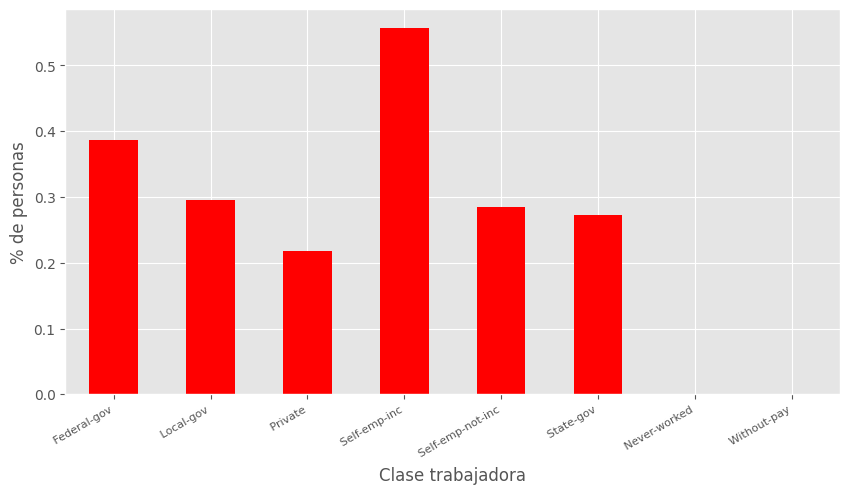

In [ ]:
plt.figure(figsize=(10,5))
ax = dist_data_final.plot(kind = 'bar', color = 'r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Clase trabajadora')
ax.set_ylabel('% de personas')

Personas laboralmente independientes con empresa son los que ganan más, seguidos por los empleados de gobiernos federales.

<strong>Hipótesis 3: Personas con más educación ganan más</strong>

Text(0, 0.5, '% de Personas')

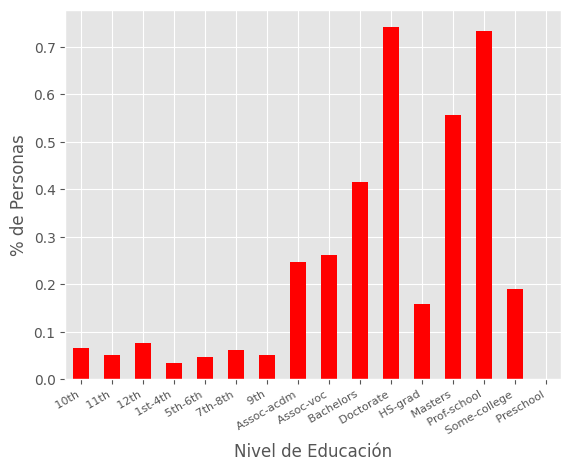

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('education').education.count()
                          , data[data.greater_than_50k == 0].groupby('education').education.count()], axis=1)

dist_data.columns = ['education_gt50','education_lt50']

dist_data_final = dist_data.education_gt50 / (dist_data.education_gt50 + dist_data.education_lt50 )

#dist_data_final.sort(ascending = False)
ax =dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Nivel de Educación')
ax.set_ylabel('% de Personas')

A mayor educación, mayores ingresos.

<strong>Hipótesis 4: Las personas casadas suelen ganar más</strong>

Text(0, 0.5, '% de personas')

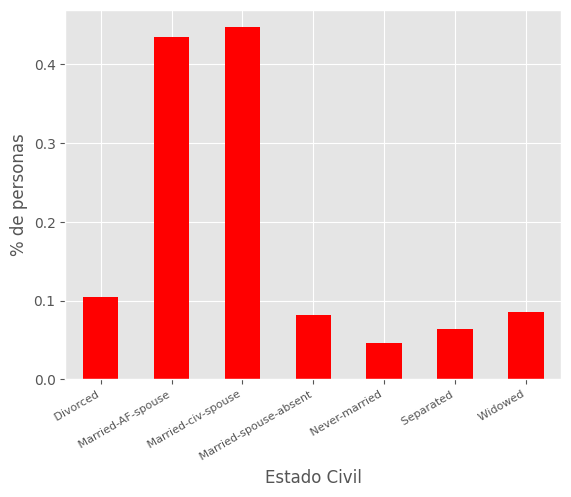

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('marital_status').marital_status.count()
                          , data[data.greater_than_50k == 0].groupby('marital_status').marital_status.count()], axis=1)

dist_data.columns = ['marital_status_gt50','marital_status_lt50']

dist_data_final = dist_data.marital_status_gt50 / (dist_data.marital_status_gt50 + dist_data.marital_status_lt50 )

ax = dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('% de personas')

Las personas casadas tienden a ganar más.

<strong>Hipótesis 5: Los ingresos dependen de la ocupación </strong>

Text(0, 0.5, '% de Personas')

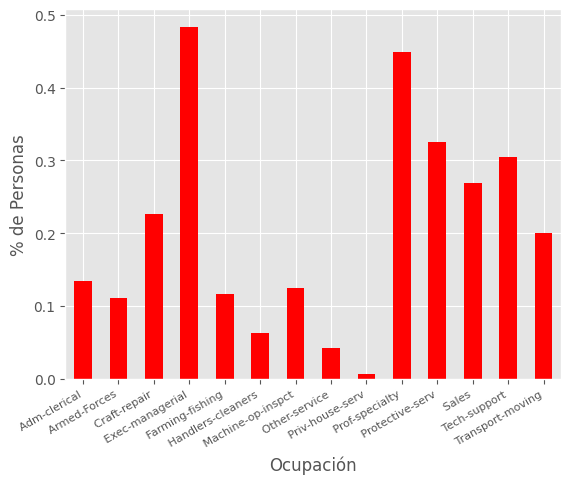

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('occupation').occupation.count()
                          , data[data.greater_than_50k == 0].groupby('occupation').occupation.count()], axis=1)

dist_data.columns = ['occupation_gt50','occupation_lt50']

dist_data_final = dist_data.occupation_gt50 / (dist_data.occupation_gt50 + dist_data.occupation_lt50 )

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Ocupación')
ax.set_ylabel('% de Personas')

<strong>Hipótesis 6: Hombres ganan más</strong>

Text(0, 0.5, '% de Personas')

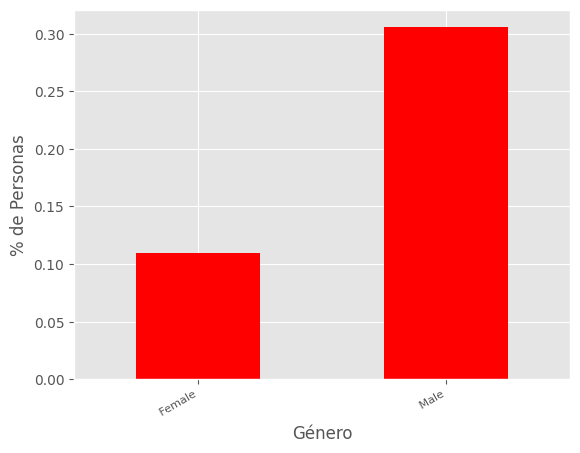

In [ ]:
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('gender').gender.count()
                          , data[data.greater_than_50k == 0].groupby('gender').gender.count()], axis=1)

dist_data.columns = ['gender_gt50','gender_lt50']

dist_data_final = dist_data.gender_gt50 / (dist_data.gender_gt50 + dist_data.gender_lt50 )

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Género')
ax.set_ylabel('% de Personas')

<strong>Hipótesis 9: Ingresos por país de origen</strong>

Text(0, 0.5, '% de Personas')

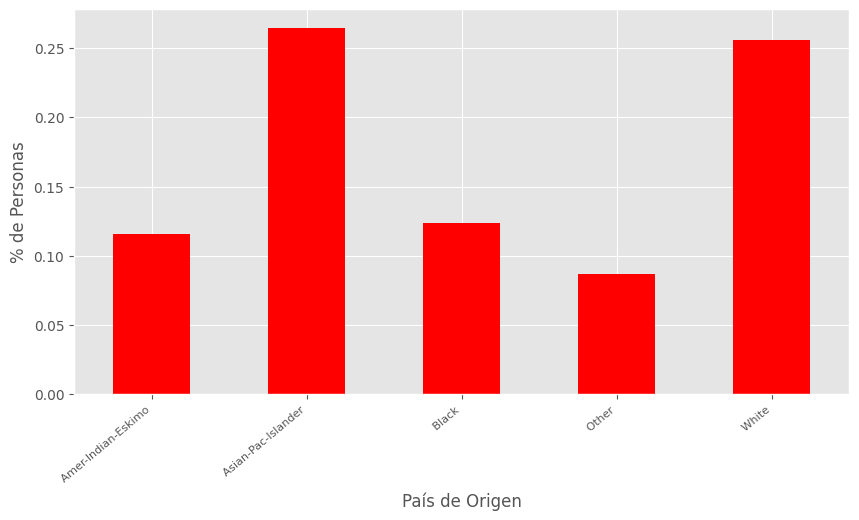

In [ ]:
plt.figure(figsize=(10,5))
dist_data = pd.concat([data[data.greater_than_50k == 1].groupby('race').native_country.count()
                          , data[data.greater_than_50k == 0].groupby('race').native_country.count()], axis=1)

dist_data.columns = ['native_country_gt50','native_country_lt50']

dist_data_final = dist_data.native_country_gt50 / (dist_data.native_country_gt50 + dist_data.native_country_lt50 )

ax = dist_data_final.plot(kind = 'bar', color = 'r')

ax.set_xticklabels(dist_data_final.index, rotation=40, fontsize=8, ha='right')
ax.set_xlabel('País de Origen')
ax.set_ylabel('% de Personas')

Las personas de Francia, India, Iran y Taiwan son los de mayores ingresos.

## Decision Trees

Usaremos los árboles de decisión para entender el perfil de aquellos que ganan más de $50K anuales.

In [ ]:
data.shape

(32560, 11)

In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'native_country',
       'greater_than_50k'],
      dtype='object')

In [ ]:
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [ ]:
data.groupby('workclass').workclass.count()

workclass
 Federal-gov           960
 Local-gov            2093
 Never-worked            7
 Private             22695
 Self-emp-inc         1116
 Self-emp-not-inc     2541
 State-gov            1298
 Without-pay            14
Name: workclass, dtype: int64

In [ ]:
# create a DataFrame of dummy variables for workclass
workclass_dummies = pd.get_dummies(data.workclass, prefix='Wkc_')
workclass_dummies.head()

,Wkc__ Federal-gov,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [ ]:
workclass_dummies.drop(workclass_dummies.columns[0],axis=1,inplace=True)
workclass_dummies.head()

,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [ ]:
mat_x=data.iloc[:,:-1]
mat_y=data.iloc[:,-1]

In [ ]:
mat_x.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [ ]:
mat_y.head()

0    0
1    0
2    0
3    0
4    0
Name: greater_than_50k, dtype: int64

In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census0 = pd.concat([mat_x,workclass_dummies], axis=1)
data_census0.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,1,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,1,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for education
educ_dummies = pd.get_dummies(data.education, prefix='educ_')
educ_dummies.drop(educ_dummies.columns[0],axis=1,inplace=True)
educ_dummies.head()

,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census1 = pd.concat([data_census0,educ_dummies], axis=1)
data_census1.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,1,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for marital_status
ms_dummies = pd.get_dummies(data.marital_status, prefix='ms_')
ms_dummies.drop(ms_dummies.columns[0],axis=1,inplace=True)
ms_dummies.head()

,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census2 = pd.concat([data_census1,ms_dummies], axis=1)
data_census2.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,1,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for occupation
oc_dummies = pd.get_dummies(data.occupation, prefix='oc_')
oc_dummies.drop(oc_dummies.columns[0],axis=1,inplace=True)
oc_dummies.head()

,oc__ Armed-Forces,oc__ Craft-repair,oc__ Exec-managerial,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census3 = pd.concat([data_census2,oc_dummies], axis=1)
data_census3.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for relationship
rs_dummies = pd.get_dummies(data.relationship, prefix='rs_')
rs_dummies.drop(rs_dummies.columns[0],axis=1,inplace=True)
rs_dummies.head()

,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census4 = pd.concat([data_census3,rs_dummies], axis=1)
data_census4.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# create a DataFrame of dummy variables for race
race_dummies = pd.get_dummies(data.race, prefix='race_')
race_dummies.drop(race_dummies.columns[0],axis=1,inplace=True)
race_dummies.head()

,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census5 = pd.concat([data_census4,race_dummies], axis=1)
data_census5.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,oc__ Transport-moving,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,1,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
# create a DataFrame of dummy variables for gender
gender_dummies = pd.get_dummies(data.gender, prefix='gender_')
gender_dummies.drop(gender_dummies.columns[0],axis=1,inplace=True)
gender_dummies.head()

,gender__ Male
0,1
1,1
2,1
3,1
4,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census6 = pd.concat([data_census5,gender_dummies], axis=1)
data_census6.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,gender__ Male
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,1,0,0,0,0,0,0,0,1,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,0,1,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,1,0,0,0,0,0,0,0,1,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,1,0,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# create a DataFrame of dummy variables for country
country_dummies = pd.get_dummies(data.native_country, prefix='nc_')
country_dummies.drop(country_dummies.columns[0],axis=1,inplace=True)
country_dummies.head()

,nc__ Canada,nc__ China,nc__ Columbia,nc__ Cuba,nc__ Dominican-Republic,nc__ Ecuador,nc__ El-Salvador,nc__ England,nc__ France,nc__ Germany,...,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census7 = pd.concat([data_census6,country_dummies], axis=1)
data_census7.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_census7.columns.values

array(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'Wkc__ Local-gov', 'Wkc__ Never-worked',
       'Wkc__ Private', 'Wkc__ Self-emp-inc', 'Wkc__ Self-emp-not-inc',
       'Wkc__ State-gov', 'Wkc__ Without-pay', 'educ__ 11th',
       'educ__ 12th', 'educ__ 1st-4th', 'educ__ 5th-6th',
       'educ__ 7th-8th', 'educ__ 9th', 'educ__ Assoc-acdm',
       'educ__ Assoc-voc', 'educ__ Bachelors', 'educ__ Doctorate',
       'educ__ HS-grad', 'educ__ Masters', 'educ__ Preschool',
       'educ__ Prof-school', 'educ__ Some-college',
       'ms__ Married-AF-spouse', 'ms__ Married-civ-spouse',
       'ms__ Married-spouse-absent', 'ms__ Never-married',
       'ms__ Separated', 'ms__ Widowed', 'oc__ Armed-Forces',
       'oc__ Craft-repair', 'oc__ Exec-managerial',
       'oc__ Farming-fishing', 'oc__ Handlers-cleaners',
       'oc__ Machine-op-inspct', 'oc__ Other-service',
       'oc__ Priv-house-

In [ ]:
features = ['age','hours_per_week',
       'Wkc__ Local-gov', 'Wkc__ Never-worked', 'Wkc__ Private',
       'Wkc__ Self-emp-inc', 'Wkc__ Self-emp-not-inc', 'Wkc__ State-gov',
       'Wkc__ Without-pay', 'educ__ 11th', 'educ__ 12th', 'educ__ 1st-4th',
       'educ__ 5th-6th', 'educ__ 7th-8th', 'educ__ 9th', 'educ__ Assoc-acdm',
       'educ__ Assoc-voc', 'educ__ Bachelors', 'educ__ Doctorate',
       'educ__ HS-grad', 'educ__ Masters', 'educ__ Preschool',
       'educ__ Prof-school', 'educ__ Some-college', 'ms__ Married-AF-spouse',
       'ms__ Married-civ-spouse', 'ms__ Married-spouse-absent',
       'ms__ Never-married', 'ms__ Separated', 'ms__ Widowed',
       'oc__ Armed-Forces', 'oc__ Craft-repair', 'oc__ Exec-managerial',
       'oc__ Farming-fishing', 'oc__ Handlers-cleaners',
       'oc__ Machine-op-inspct', 'oc__ Other-service', 'oc__ Priv-house-serv',
       'oc__ Prof-specialty', 'oc__ Protective-serv', 'oc__ Sales',
       'oc__ Tech-support', 'oc__ Transport-moving', 'rs__ Not-in-family',
       'rs__ Other-relative', 'rs__ Own-child', 'rs__ Unmarried', 'rs__ Wife',
       'race__ Asian-Pac-Islander', 'race__ Black', 'race__ Other',
       'race__ White', 'gender__ Male', 'nc__ Canada', 'nc__ China',
       'nc__ Columbia', 'nc__ Cuba', 'nc__ Dominican-Republic', 'nc__ Ecuador',
       'nc__ El-Salvador', 'nc__ England', 'nc__ France', 'nc__ Germany',
       'nc__ Greece', 'nc__ Guatemala', 'nc__ Haiti', 'nc__ Honduras',
       'nc__ Hong', 'nc__ Hungary', 'nc__ India', 'nc__ Iran', 'nc__ Ireland',
       'nc__ Italy', 'nc__ Jamaica', 'nc__ Japan', 'nc__ Laos', 'nc__ Mexico',
       'nc__ Nicaragua', 'nc__ Outlying-US(Guam-USVI-etc)', 'nc__ Peru',
       'nc__ Philippines', 'nc__ Poland', 'nc__ Portugal', 'nc__ Puerto-Rico',
       'nc__ Scotland', 'nc__ South', 'nc__ Taiwan', 'nc__ Thailand',
       'nc__ Trinadad&Tobago', 'nc__ United-States', 'nc__ Vietnam',
       'nc__ Yugoslavia']

In [ ]:
data_census8=data_census7[features]
data_census8.head()

,age,hours_per_week,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,...,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,40,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census9 = pd.concat([data_census8,mat_y], axis=1)
data_census9.head()

,age,hours_per_week,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,...,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia,greater_than_50k
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,40,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_model=data_census9.values

In [ ]:
# Features (predictors)
data_model[0:5,:-1]

array([[39, 40,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [50, 13,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [38, 40,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0

In [ ]:
# Target
data_model[0:5,-1]

array([0, 0, 0, 0, 0])

## Particion-

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_model[:,:-1],data_model[:,-1], test_size = 0.3, random_state = 100)

In [ ]:
X_train

array([[28, 40,  0, ...,  1,  0,  0],
       [46, 38,  0, ...,  1,  0,  0],
       [56, 15,  0, ...,  1,  0,  0],
       ...,
       [32, 50,  0, ...,  0,  0,  0],
       [23, 36,  0, ...,  0,  0,  0],
       [35, 40,  0, ...,  1,  0,  0]])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
feat_importance=pd.DataFrame({'feature':features, 'importance':clf_gini.feature_importances_})

In [ ]:
feat_importance.to_csv(path_dmc + 'importancia.csv')

In [ ]:
clf_gini.feature_importances_

array([0.02418128, 0.04802307, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10786365, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.71714959, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10278242, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
feat_importance.to_csv('features_importance.csv')

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

In [ ]:
with open(path_dmc + "tree_income.txt", "w") as f:
    f = export_graphviz(clf_gini, out_file=f,feature_names=features)

In [ ]:
y_pred = clf_gini.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_prob = clf_gini.predict_proba(X_test)
y_prob

array([[0.98900155, 0.01099845],
       [0.75337423, 0.24662577],
       [0.64644324, 0.35355676],
       ...,
       [0.98900155, 0.01099845],
       [0.58579882, 0.41420118],
       [0.98900155, 0.01099845]])

In [ ]:
y_prob[:,1]

array([0.01099845, 0.24662577, 0.35355676, ..., 0.01099845, 0.41420118,
       0.01099845])

In [ ]:
pd.DataFrame(y_prob[:,1]).to_csv(path_dmc + 'probabilidad.csv')

Veamos como performa el modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)*100

81.1015561015561

### Matriz de Confusión y otros indicadores

In [ ]:
pd.crosstab(y_test,y_pred
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,7100,346
1,1500,822


### Accuracy

In [ ]:
(7100+822)/(1500+822+7100+346)

0.811015561015561

### Recall

In [ ]:
7100/(7100+346)

0.9535320977706151

In [ ]:
822/(1500+822)

0.35400516795865633

### Precision

In [ ]:
7100/(7100+1500)

0.8255813953488372

In [ ]:
822/(346+822)

0.7037671232876712

### F1 Score

In [ ]:
2*(0.83*0.95)/(0.83+0.95)

0.8859550561797753

In [ ]:
2*(0.7*0.35)/(0.7+0.35)

0.4666666666666667

### Measure of the model

In [ ]:
print ('\n \n')

print (classification_report(y_test,y_pred))


 

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7446
           1       0.70      0.35      0.47      2322

    accuracy                           0.81      9768
   macro avg       0.76      0.65      0.68      9768
weighted avg       0.80      0.81      0.79      9768



### Evaluate the balance of data

In [ ]:
data_census9.head()

,age,hours_per_week,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,...,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia,greater_than_50k
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,40,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
100/10100

0.009900990099009901

In [ ]:
data_census9.groupby('greater_than_50k').greater_than_50k.count()

greater_than_50k
0    24719
1     7841
Name: greater_than_50k, dtype: int64

In [ ]:
7841/(7841+24719)

0.24081695331695332

In [ ]:
data_census9[data_census9.greater_than_50k==0].head()

,age,hours_per_week,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,...,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia,greater_than_50k
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,40,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_census9.shape[0]

32560

In [ ]:
data_census9.iloc[0:5,-1]

0    0
1    0
2    0
3    0
4    0
Name: greater_than_50k, dtype: int64

In [ ]:
(data_census9.iloc[:,-1]==0).sum()

24719

In [ ]:
(data_census9.iloc[:,-1]==1).sum()

7841

In [ ]:
(7841*0.55)/0.45

9583.444444444445

In [ ]:
(7841/0.45)-7841

9583.444444444445

In [ ]:
9583.444444444445 / 24719

0.3876954749158318

In [ ]:
data_census9.iloc[0:5,-1]==0

0    True
1    True
2    True
3    True
4    True
Name: greater_than_50k, dtype: bool

In [ ]:
np.random.seed(123)
rand_1 = np.random.binomial(n=1, p=0.3876954749158318, size=32560)
rand_1.shape

(32560,)

In [ ]:
rand_1

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
px=data_census9.iloc[:,-1]==0

In [ ]:
False | 0

0

In [ ]:
px & rand_1

0         True
1        False
2        False
3        False
4         True
         ...  
32555     True
32556    False
32557    False
32558    False
32559    False
Name: greater_than_50k, Length: 32560, dtype: bool

In [ ]:
def UnderSampling(X, y, target_percentage, seed):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)

    return X[filter_], y[filter_]

In [ ]:
X_u, y_u = UnderSampling(data_census9.iloc[:,:-1], data_census9.iloc[:,-1], 0.45, 123)

In [ ]:
X_u.shape

(17488, 92)

In [ ]:
y_u.shape

(17488,)

In [ ]:
9583+7841

17424

In [ ]:
X_u.head()

,age,hours_per_week,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,...,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,49,16,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,45,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_u.head()

0    0
4    0
6    0
7    1
8    1
Name: greater_than_50k, dtype: int64

In [ ]:
type(y_u)

pandas.core.series.Series

In [ ]:
data_census10 = pd.concat([X_u,y_u], axis=1)
data_census10.head()

,age,hours_per_week,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,...,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia,greater_than_50k
0,39,40,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,49,16,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,45,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,31,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
data_census10.groupby('greater_than_50k').greater_than_50k.count()

greater_than_50k
0    9647
1    7841
Name: greater_than_50k, dtype: int64

In [ ]:
7841/(7841+9647)

0.44836459286367797

In [ ]:
data_model=data_census10.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_model[:,:-1],data_model[:,-1], test_size = 0.3, random_state = 123)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_test,y_pred)*100

75.14770344959024

In [ ]:
pd.crosstab(y_test,y_pred
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,1930,950
1,354,2013


In [ ]:
print ('\n \n')

print (classification_report(y_test,y_pred))


 

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      2880
           1       0.68      0.85      0.76      2367

    accuracy                           0.75      5247
   macro avg       0.76      0.76      0.75      5247
weighted avg       0.77      0.75      0.75      5247



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf_gini, X_train, y_train, cv=10)

array([0.75510204, 0.75326797, 0.75490196, 0.73284314, 0.74836601,
       0.75326797, 0.74101307, 0.74183007, 0.75      , 0.72875817])

### Tuning de parámetros (máxima profundidad)

In [ ]:
# list of values to try for max_depth
max_depth_range = range(1, 20)

# list to store the average RMSE for each value of max_depth
mean_accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
#from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=depth, min_samples_leaf=5)
    crossval_scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring='roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

In [ ]:
crossval_scores

array([0.82741997, 0.8442964 , 0.84075081, 0.82751763, 0.85274588,
       0.83261323, 0.82881381, 0.85165664, 0.84622133, 0.8310883 ])

In [ ]:
mean_accuracy_scores

[0.7544410610518859,
 0.7955939338833671,
 0.8253585950639829,
 0.84392946021285,
 0.8535551826507473,
 0.8616548548719305,
 0.8636999052794003,
 0.8578404106754247,
 0.8559613320061658,
 0.8529739733304753,
 0.8506593729213028,
 0.8484410391697459,
 0.8470352474537897,
 0.8443687955520597,
 0.8421293552978056,
 0.8403702328876413,
 0.8391378962224689,
 0.8381412607360982,
 0.8383124009378088]

In [ ]:
# list of values to try for max_depth
max_depth_range = range(1, 20)
rango=np.arange(0,19)
a=np.zeros((19,2))

# list to store the average RMSE for each value of max_depth
#mean_accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
#from sklearn.cross_validation import cross_val_score
for depth in rango:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=depth+1, min_samples_leaf=5)
    crossval_scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring='roc_auc')
    #mean_accuracy_scores.append(np.mean(crossval_scores))
    a[depth]=[depth+1,np.mean(crossval_scores)]

In [ ]:
x=pd.DataFrame(a)
x.sort_values(1,ascending=False)

,0,1
6,7.0,0.863700
5,6.0,0.861655
7,8.0,0.857840
8,9.0,0.855961
4,5.0,0.853555
9,10.0,0.852974
10,11.0,0.850659
11,12.0,0.848441
12,13.0,0.847035
13,14.0,0.844369


In [ ]:
mean_accuracy_scores

[0.7544410610518859,
 0.7955939338833671,
 0.8253585950639829,
 0.84392946021285,
 0.8535551826507473,
 0.8616548548719305,
 0.8636999052794003,
 0.8578404106754247,
 0.8559613320061658,
 0.8529739733304753,
 0.8506593729213028,
 0.8484410391697459,
 0.8470352474537897,
 0.8443687955520597,
 0.8421293552978056,
 0.8403702328876413,
 0.8391378962224689,
 0.8381412607360982,
 0.8383124009378088]

Text(0, 0.5, 'Accuracy (más alto mejor)')

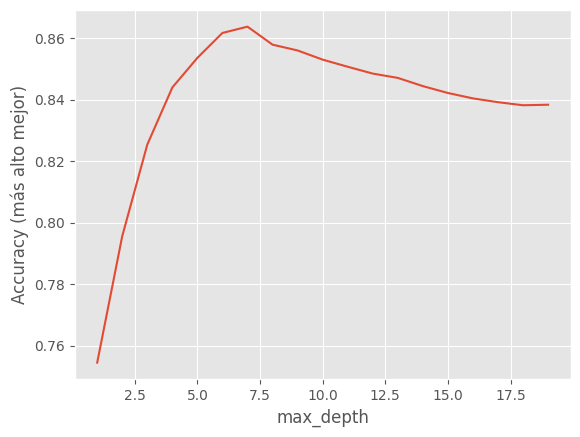

In [ ]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(max_depth_range, mean_accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy (más alto mejor)')

### Tuning de parámetros (Número mínimo de casos)

In [ ]:
# list of values to try for max_depth
min_samples_range = range(1, 100)

# list to store the average RMSE for each value of max_depth
mean_accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
#from sklearn.cross_validation import cross_val_score
for samples in min_samples_range:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=samples)
    crossval_scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring='roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

Text(0, 0.5, 'Accuracy (lower is better)')

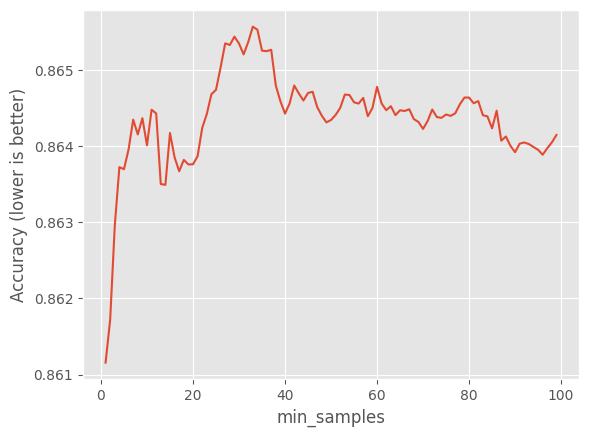

In [ ]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(min_samples_range, mean_accuracy_scores)
plt.xlabel('min_samples')
plt.ylabel('Accuracy (lower is better)')

In [ ]:
# list of values to try for max_depth
min_samples_range = range(20, 40)

# list to store the average RMSE for each value of max_depth
mean_accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
#from sklearn.cross_validation import cross_val_score
for samples in min_samples_range:
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=samples)
    crossval_scores = cross_val_score(clf_gini, X_train, y_train, cv=10, scoring = 'roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

Text(0, 0.5, 'Accuracy (lower is better)')

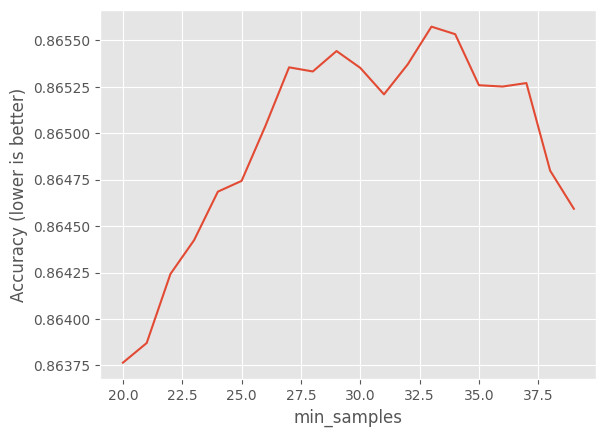

In [ ]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(min_samples_range, mean_accuracy_scores)
plt.xlabel('min_samples')
plt.ylabel('Accuracy (lower is better)')

In [ ]:
mean_accuracy_scores

[0.8637649489332786,
 0.8638706248363693,
 0.8642423176185897,
 0.8644251720011512,
 0.8646859198215461,
 0.864743924524656,
 0.8650389845604108,
 0.8653554606526063,
 0.8653331795914418,
 0.8654432633718775,
 0.8653525696675501,
 0.8652098440652555,
 0.8653714986659751,
 0.8655745337708064,
 0.8655339609636865,
 0.8652590536199514,
 0.8652520403132208,
 0.8652707496543623,
 0.8647992370283795,
 0.864593765598514]

### Decision Tree with the best parameters

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=33)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=33, random_state=100)

In [ ]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(cm)
print("accuracy = " + str(accuracy))
print("roc_auc = " + str(roc_auc))

[[2131  749]
 [ 407 1960]]
accuracy = 0.7796836287402326
roc_auc = 0.7839914712716518


In [ ]:
pd.crosstab(y_test,y_pred
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

Predicho,0,1
Real,,
0,2131,749
1,407,1960


In [ ]:
print ('\n \n')

print (classification_report(y_test,y_pred))


 

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2880
           1       0.72      0.83      0.77      2367

    accuracy                           0.78      5247
   macro avg       0.78      0.78      0.78      5247
weighted avg       0.79      0.78      0.78      5247



### Random Forest

Random Forests is a **slight variation of bagged trees** that has even better performance:

- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set.
- However, when building each tree, each time a split is considered, a **random sample of m features** is chosen as split candidates from the **full set of p features**. The split is only allowed to use **one of those m features**.
    - A new random sample of features is chosen for **every single tree at every single split**.
    - For **classification**, m is typically chosen to be the square root of p.
    - For **regression**, m is typically chosen to be somewhere between p/3 and p.

What's the point?

- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are **highly correlated**.
- Averaging highly correlated quantities does not significantly reduce variance (which is the entire goal of bagging).
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcla = RandomForestClassifier()
rfcla

RandomForestClassifier()

### Tuning n_estimators

One important tuning parameter is **n_estimators**, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized".

In [ ]:
# list of values to try for n_estimators
estimator_range = range(300, 600, 10)

# list to store the average RMSE for each value of n_estimators
mean_accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rfcla = RandomForestClassifier(n_estimators=estimator, random_state=123, n_jobs=-1)
    crossval_scores = cross_val_score(rfcla, X_train, y_train, cv=5, scoring='roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

Text(0, 0.5, 'Accuracy (lower is better)')

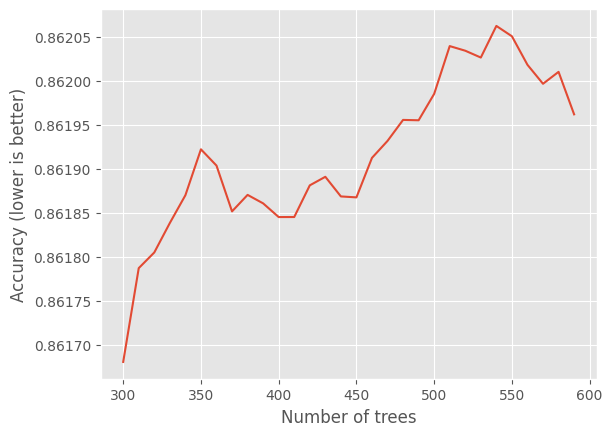

In [ ]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(estimator_range, mean_accuracy_scores)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy (lower is better)')

### Tuning max_features

The other important tuning parameter is **max_features**, which is the number of features that should be considered at each split.

In [ ]:
X_train.shape[1]

92

In [ ]:
X_train

array([[26, 40,  0, ...,  1,  0,  0],
       [46, 50,  0, ...,  1,  0,  0],
       [32, 40,  0, ...,  1,  0,  0],
       ...,
       [39, 40,  0, ...,  1,  0,  0],
       [22, 40,  0, ...,  1,  0,  0],
       [25, 40,  0, ...,  1,  0,  0]])

In [ ]:
# list of values to try for n_estimators
feature_range = range(1, X_train.shape[1]+1)

# list to store the average RMSE for each value of n_estimators
mean_accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for feature in feature_range:
    rfcla = RandomForestClassifier(n_estimators=510,max_features=feature,random_state=123, n_jobs=-1)
    crossval_scores = cross_val_score(rfcla, X_train, y_train, cv=5, scoring='roc_auc')
    mean_accuracy_scores.append(np.mean(crossval_scores))

In [ ]:
# plot max_depth (x-axis) versus accuracy (y-axis)
plt.plot(feature_range, mean_accuracy_scores)
plt.xlabel('Number of features')
plt.ylabel('Accuracy (lower is better)')

In [ ]:
mean_accuracy_scores

### Random Forest with the best parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcla = RandomForestClassifier()
rfcla

In [ ]:
rfcla = RandomForestClassifier(n_estimators=510,max_features=19,random_state=123, n_jobs=-1)
rfcla.fit(X_train, y_train)

In [ ]:
y_pred = rfcla.predict(X_test)
y_pred

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(cm)
print("accuracy = " + str(accuracy))
print("roc_auc = " + str(roc_auc))

In [ ]:
pd.crosstab(y_test,y_pred
                  ,rownames = ['Real']
                  ,colnames = ['Predicho'])

In [ ]:
print ('\n \n')

print (classification_report(y_test,y_pred))